# Angewandte Aspekte der Sprechforschung: Individuelle Sprechstile


## *Shushen Manakhimova*

## *Professor Burkhardt*

#### Sommersemester 2021 01.09.2021

We begin with downloading all the required modules for the project. Modules are simply files  with Python code (a code library or a set of functions that you need) that can be imported inside another Python Program. 

You can use any Python source file as a module by executing an import statement in some other Python source file. 

Step 1 in our code

In the project we use the code from Professor Uwe Reichel to extract Midlevel Descriptors 

In [1]:
import sys 
#sys module provides information about constants, functions and methods. 
#First, we have to import the sys module in our program before running any functions
sys.path.append("./mld/src") #adding a specific path for interpreter to search
import midlevel_descriptors as mld #Uwe Reichel Github 
import opensmile # audio feature extraction and classification of speech and music signals
import os # provides functions for interacting with the operating system (individual files)
import pandas as pd #module for data analysis toolkit 
import IPython #interactive shell, we will use it later to play the audio
import audiofile as af 
sys.path.append("./text_features") #adding a path for the interpreter to search 
import text_features as tf #extracting linguistic features (number of pronouns, etc)
import asr as speechrec #used to transcribe speeches
asr = speechrec.ASR('eng') #assigning value to a variable, using function ASR

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shushanamanakhimova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_king = pd.read_pickle('/Users/shushanamanakhimova/S_Sprechstil/segments/Shushana_mdf.pkl') #reading the file provided by our Professor
df_king['segmented_file'] = df_king['segmented_file'].apply(lambda x: 'segments/'+os.path.basename(x)) #changing the path
df_king = df_king.set_index(df_king.segmented_file) #setting the index
df_king = df_king.drop(columns=['segmented_file', 'channel']) #erasing extra information

In [ ]:
df_king.head() #head() function is used to get the first n-rows.

In [ ]:
IPython.display.Audio(df_king.index[3]) #playing the file, choosing a file with an index

In [3]:
fex_mld = mld.MLD() #mld feature extraction
df_mld_seqs = fex_mld.extract_from_index(index=df_king, cache_path='./tmp/mld')
df_asr = asr.extract_from_index(df_mld_seqs, tmp='./tmp',  margin=0.2)

  0%|          | 0/77 [00:00<?, ?it/s]

ASR ...


100%|██████████| 77/77 [01:20<00:00,  1.05s/it]


In [ ]:
df_king.shape #shows the number of rows and columns

In [ ]:
df_mld_seqs.shape #the result is that the speech is quite short (77 segments, 580 rows of features in general)

In [ ]:
df_mld_seqs.head(5) #for every row we have to extract the contents, all of the mld features

In [ ]:
#low level descriptors
smile_lld = opensmile.Smile(
feature_set = opensmile.FeatureSet.GeMAPSv01b,
feature_level = opensmile.FeatureLevel.LowLevelDescriptors,
)
smile_functionals = opensmile.Smile(
feature_set = opensmile.FeatureSet.GeMAPSv01b,
feature_level = opensmile.FeatureLevel.Functionals,
) 

In [ ]:
lld_df = smile_lld.process_files(df_king.index)
print(lld_df.shape)

In [ ]:
funct_df = smile_functionals.process_files(df_king.index)
print(funct_df.shape)

In [ ]:
lld_df.head(3)

In [ ]:
funct_df.head(3)

In [ ]:
df_mld_seqs.head(5)

# Text Features

In this part of the project we are going to get a transcription of the speech and extract some linguistic features

In [ ]:
fex = tf.PsyText(language="eng")
ling_df = pd.DataFrame()
t_all = ''
for t in df_asr.asr:
    t_all = t_all+' '+t
    try:
        feat = fex.extract_from_string(t)
    except ZeroDivisionError:
        feat = pd.DataFrame()
    ling_df = ling_df.append(feat)

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
t_all

In [ ]:
ling_df.head()

# Adding Annotations 

In [4]:
from enum import Enum, auto #enums are to define unique sets of names and values; they are created using classes
class SPEECHTYPE(Enum):
    acceptance = auto() 
    debate = auto() 
    demonstrative = auto() # workshop or seminar where a speaker was showing 
    entertaining = auto() # Entertaining speeches aim to amuse a crowd of people
    eulogy = auto()
    explanatory = auto() # Explanatory speeches describe a situation or particular thing. 
    farewell = auto()
    impromptu = auto()
    informative = auto() # Informative speeches aim to educate an audience on a particular topic or message.
    interview = auto() 
    personal = auto()
    persuasive = auto()
    pitch = auto()
    preaching = auto()
    oratorical = auto() # is J. F. Kennedy’s inaugural speech.
    synthetiac = auto()

In [5]:
class GENDER(Enum):
    FEMALE = auto()
    MALE = auto()
    DIVERS = auto()
class SPEAKERTYPE(Enum):
    HUMAN = auto()
    SYNTH = auto()

In [6]:
ad ={'id':'martin_luther_king', 
     'gender':'male', 
     'speakertype': 'human',
     'age': 35, 
     'speechtype': 'preaching',
     'lang':'eng-ENG', 
     'source':'https://www.npr.org/2010/01/18/122701268/i-have-a-dream-speech-in-its-entirety'}
for k in ad:
    df_king[k] = ad[k]
df_king.to_pickle('Annotations/king.pkl')

In [7]:
df_king.head() #checking if everything is correct

,id,gender,speakertype,age,speechtype,lang,source
segmented_file,,,,,,,
segments/MK_Shushana_seg_00000000.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000001.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000002.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000003.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000004.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...


In [8]:
pd.read_pickle('Annotations/king.pkl') #reading the pickle file

,id,gender,speakertype,age,speechtype,lang,source
segmented_file,,,,,,,
segments/MK_Shushana_seg_00000000.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000001.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000002.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000003.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000004.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
...,...,...,...,...,...,...,...
segments/MK_Shushana_seg_00000072.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000073.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...
segments/MK_Shushana_seg_00000074.wav,martin_luther_king,male,human,35,preaching,eng-ENG,https://www.npr.org/2010/01/18/122701268/i-hav...


# Large Dataframe & Visualisation

In [9]:
import glob #used to retrieve files/pathnames matching a specified pattern
from pathlib import Path 
import numpy as np
import shutil #high-level operations on collections of files
import sys
sys.path.append("./mld/src")
import matplotlib.pyplot as plt #for generating boxplots 
import seaborn as sns  #another data visualization library based on matplotlib

In [10]:
in_directory = './Annotations/' #the directory where all the required files are stored

In [11]:
# copy all wav files to one directory; 
wav_sources = 'processed/'
wav_target = 'all_wavs'
for file in Path(wav_sources).rglob('*.wav'): #(base, pattern); recursive glob starting in specified directory
    if os.path.isfile(file):
        shutil.copy2(file, wav_target)

In [12]:
# Fix pandas error with Orschulik df
df_q = pd.read_pickle('./processed/Orschulik/Orschulik_mdf.pkl')
def re_arrange_df(df, audio_dir):
    df['segmented_file'] = df['segmented_file'].apply(lambda x: audio_dir+os.path.basename(x))
    df = df.set_index(df.segmented_file)
    df = df.drop(columns=['segmented_file', 'channel'])
    return df
df_q = re_arrange_df(df_q, 'all_wavs/')

ad ={'id':'Q-Stimme', 
     'gender': 'divers', 
     'speakertype': 'synthetic',
     'age': 35, 
     'lang':'de-DE', 
     'speechtype':'synthetic',
     'source':'https://www.genderlessvoice.com/'}
for k in ad:
    df_q[k] = ad[k]
df_q.to_pickle('speeches/q.pkl')

df_q.head()

,id,gender,speakertype,age,lang,speechtype,source
segmented_file,,,,,,,
all_wavs/Q-Stimme_Orschulik_seg_00000000.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000001.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000002.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000003.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/
all_wavs/Q-Stimme_Orschulik_seg_00000004.wav,Q-Stimme,divers,synthetic,35,de-DE,synthetic,https://www.genderlessvoice.com/


In [13]:
# Fix file path with Wannenmacher df
df_wannenmacher = pd.read_pickle('./Annotations/Apt.pkl')
df_wannenmacher.head()
df_wannenmacher.index = df_wannenmacher.index.to_series().apply(lambda x: x[3:])
df_wannenmacher.to_pickle('./Annotations/Apt.pkl')

In [14]:
#create a collective data frame with all the zip files from folder
df = pd.DataFrame()
audio_directory = 'all_wavs/'
for file in glob.glob(in_directory+'*.pkl'):
    print(file)
    df_tmp = pd.read_pickle(file)
    try:
        df_tmp['gender'] = df_tmp.sex
        df_tmp = df_tmp.drop(columns=['sex'])
    except (KeyError, AttributeError) as e:
        pass
    df_tmp.index = df_tmp.index.to_series().apply(lambda x: audio_directory+os.path.basename(x))
    df = df.append(df_tmp)

./Annotations/Apt.pkl
./Annotations/schumacher.pkl
./Annotations/king.pkl
./Annotations/alexa.pkl
./Annotations/amthor.pkl
./Annotations/Drosten.pkl
./Annotations/geliebte_anno.pkl
./Annotations/obama.pkl
./Annotations/thunberg.pkl
./Annotations/bartsch.pkl
./Annotations/q.pkl


In [15]:
df.id.unique()

array(['Daniel_Apt', 'hajo_schumacher', 'martin_luther_king', 'alexa',
       'philipp.amthor', 'Drosten', 'hildegard_knef', 'michelle_obama',
       'greta_thunberg', 'dietmar_bartsch', 'Q-Stimme'], dtype=object)

In [28]:
df.head(6)

,id,gender,speakertype,age,lang,speechtype,source
segmented_file,,,,,,,
all_wavs/000000.wav,Daniel_Apt,male,human,28,de-DE,explanatory,https://www.youtube.com/watch?v=9ktOUffssTA
all_wavs/000001.wav,Daniel_Apt,male,human,28,de-DE,explanatory,https://www.youtube.com/watch?v=9ktOUffssTA
all_wavs/000002.wav,Daniel_Apt,male,human,28,de-DE,explanatory,https://www.youtube.com/watch?v=9ktOUffssTA
all_wavs/000003.wav,Daniel_Apt,male,human,28,de-DE,explanatory,https://www.youtube.com/watch?v=9ktOUffssTA
all_wavs/000004.wav,Daniel_Apt,male,human,28,de-DE,explanatory,https://www.youtube.com/watch?v=9ktOUffssTA
all_wavs/000005.wav,Daniel_Apt,male,human,28,de-DE,explanatory,https://www.youtube.com/watch?v=9ktOUffssTA


In [17]:
df.gender.unique()

array(['male', 'female', 'divers'], dtype=object)

### Feature extraction
Mid level descriptor features are extracted from the dataframe index (containing the audio file path)

In [ ]:
fex_mld = mld.MLD()
mld_df = fex_mld.extract_from_index(index=df, cache_path='./tmp/alldf_mld_cache/cache')

In [18]:
df.shape

(794, 7)

<AxesSubplot:ylabel='speechtype'>

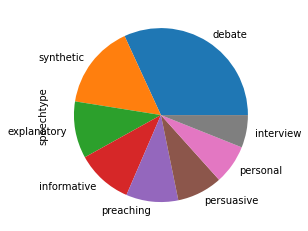

In [19]:
df.speechtype.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='speakertype'>

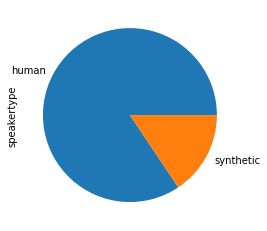

In [20]:
df.speakertype.value_counts().plot(kind='pie')

In [21]:
df_preach = df[df.speechtype=='preaching']
df_debate = df[df.speechtype=='debate']

In [22]:
def get_feats(df):
    return mld_df[mld_df.index.isin(df.index)]
feats_preach = get_feats(df_preach)
feats_debate = get_feats(df_debate)

NameError: name 'mld_df' is not defined

In [23]:
feats_preach.shape

NameError: name 'feats_preach' is not defined

In [24]:
pd.concat([feats_preach['hld_sylRate'].rename('preach'), 
           feats_debate['hld_sylRate'].rename('debate')], axis=1).boxplot()

NameError: name 'feats_preach' is not defined